# The Normal Equation

In [37]:
import warnings
warnings.filterwarnings('ignore')

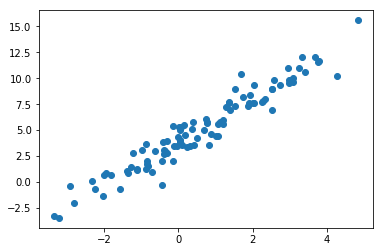

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

X = 2*np.random.randn(100, 1)
y = 4 + 2 * X + np.random.randn(100, 1)

plt.scatter(X, y)
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.8748483 ],
       [2.04794794]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.8748483 ],
       [7.97074419]])

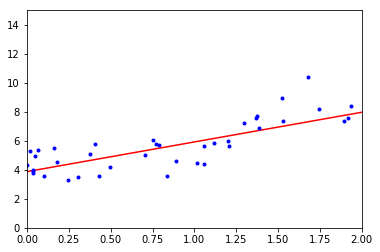

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

**The equivalent code** using Scikit-Learn looks like this:

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [8]:
lin_reg.intercept_, lin_reg.coef_

(array([3.8748483]), array([[2.04794794]]))

In [9]:
s_y_predict = lin_reg.predict(X_new)
s_y_predict

array([[3.8748483 ],
       [7.97074419]])

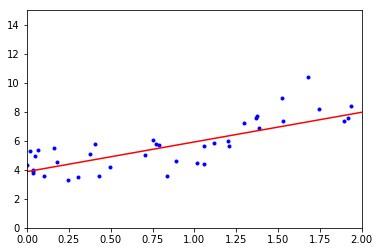

In [10]:
plt.plot(X, y, "b.")
plt.plot(X_new, s_y_predict, "r-")
plt.axis([0, 2, 0, 15])
plt.show()

In [11]:
X_new

array([[0],
       [2]])

In [12]:
s_y_predict

array([[3.8748483 ],
       [7.97074419]])

# Batch Gradient Descent

In [40]:
def plot_gradient_descent(theta, eta):
    n_iterations = 1000
    m = 100

    plt.plot(X, y, "b.")

    X_line = np.linspace(0, 2, 100).reshape(100, 1)
    X_line_b = np.c_[np.ones((100, 1)), X_line]

    for iteration in range(n_iterations):
        gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if iteration%10==0:
            plt.plot(X_line, X_line_b.dot(theta), 'k-')
    theta
    plt.axis([0, 2, 0, 15])
    plt.xlabel("$x_1$", fontsize=18)
    plt.title("$\eta={}$".format(eta), fontsize=16)
            

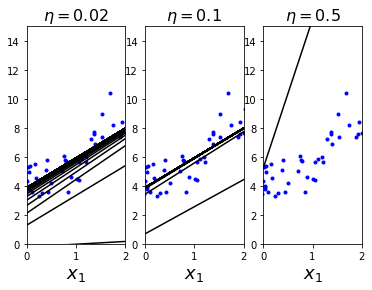

In [41]:
theta = np.random.randn(2,1)

plt.subplot(131); plot_gradient_descent(theta, 0.02)
plt.subplot(132); plot_gradient_descent(theta, 0.1)
plt.subplot(133); plot_gradient_descent(theta, 0.5)

plt.show()

# Stochastic Gradient Descent

$$\frac{\partial}{\partial\theta_j}MSE(\theta) = \frac{2}{m}\sum_{i=1}^m\left(\theta^T\cdot x^{(i)}-y^{(i)}\right)x_j^{(i)}$$

$$\nabla_{\theta}MSE(\theta)=\frac{2}{m}X^T\cdot(X\cdot\theta-y)$$

In [43]:
n_epochs = 50
t0, t1 = 5, 50
m = 100

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
theta

array([[3.81255104],
       [2.06853433]])

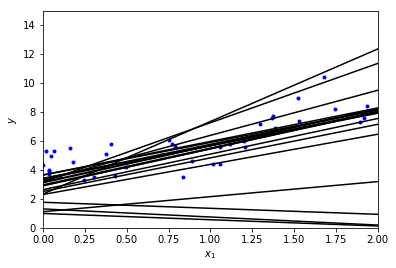

In [35]:
n_epochs = 50
t0, t1 = 5, 50
m = 100

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2, 1)

plt.plot(X, y, "b.")
for epoch in range(n_epochs):
    for i in range(m):
        if epoch==0 and i<20:
            y_predict = X_new_b.dot(theta)
            plt.plot(X_new, y_predict, "k-")
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
plt.axis([0, 2, 0, 15])
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.show()

### Perform Linear Regression using SGD with Scikit-Learn.

In [38]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=50, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [39]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.87974935]), array([2.08047328]))

# Polynomial Regression

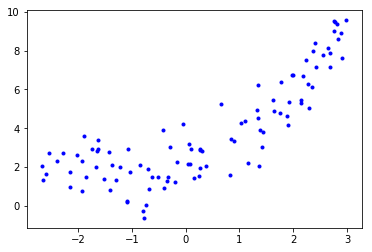

In [46]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, "b.")
plt.show()

In [47]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [48]:
X[0]

array([0.26807817])

In [49]:
X_poly[0]

array([0.26807817, 0.07186591])

In [50]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.10257719]), array([[1.00038172, 0.45607781]]))

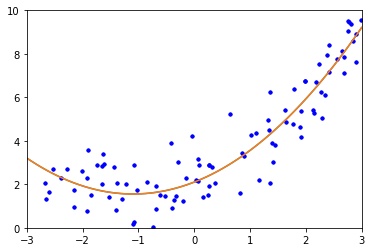

In [52]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.fit_transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "-")
plt.axis([-3, 3, 0, 10])
plt.show()